In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Patch
import os
from manuscript_functions.colors import default_cmap, timepoints_cmap, id_cmap, nonmyeloid_cmap, cmap_24, patient_to_id

In [2]:
sns.set(rc={"figure.dpi":600, 'savefig.dpi':300}, font="Arial")
# mpl.rcParams['font.sans-serif'] = "Arial"
# mpl.rcParams['font.family'] = "sans-serif"

In [3]:
datapath = "/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/Heterogeneity/"
os.chdir(datapath)

cell_meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/local_all_cells_meta_clust_celltype.csv",
                        index_col=0)
file_data = pd.read_excel("/Users/adr/Box/iPC_AML/Data/metadata_patients_20230414.xlsx", 
                          sheet_name="Patients_naw")
file_data = file_data.loc[file_data["patient_id"]!="HD13",:]

cell_meta["PatientID"] = [patient_to_id[patient] for patient in cell_meta["patient_id"]]
file_data["PatientID"] = [patient_to_id[patient] for patient in file_data["patient_id"]]


# Marker space, all cells

In [4]:
# Load results
patientID = pd.read_csv("patient_id_post_p.csv", index_col=0)

In [5]:
# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]




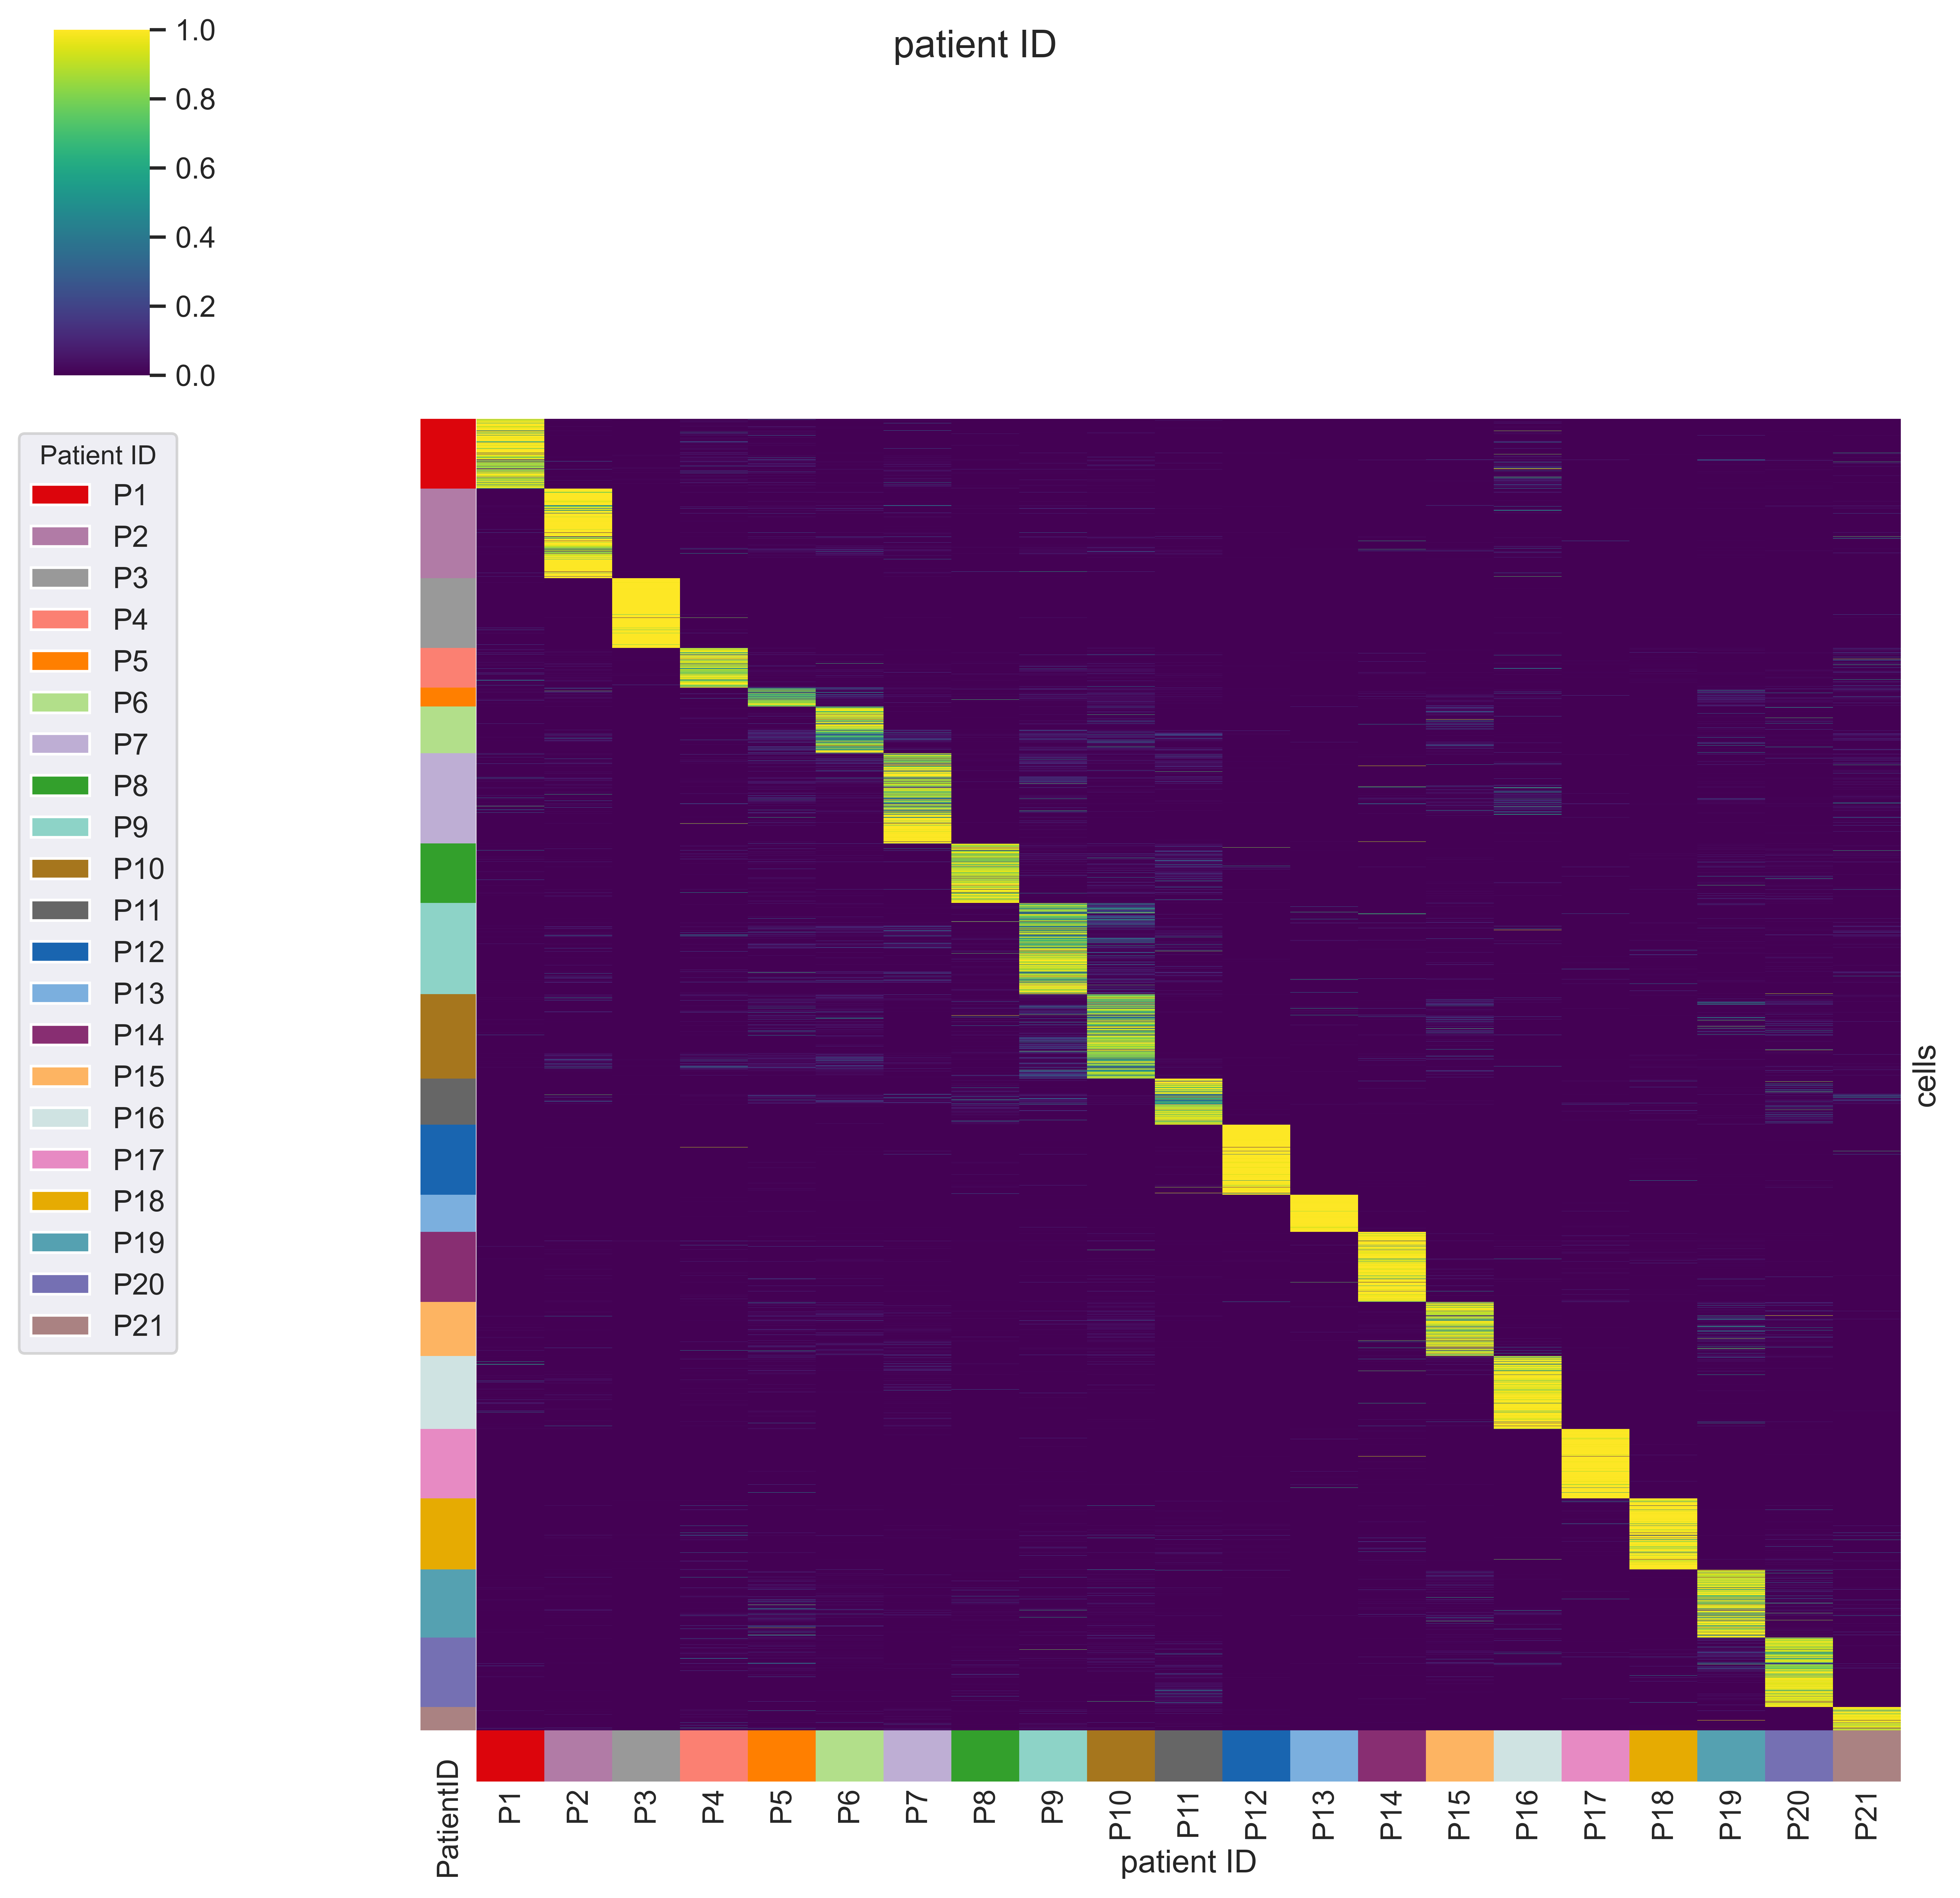

In [6]:
row_colors = cell_meta["PatientID"].map(id_cmap)
col_colors = patientID.columns.map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors, col_colors=col_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False, pad=15)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})

# Move column annotation from top to bottom
ax_col_colors = g.ax_col_colors
box = ax_col_colors.get_position()
box_heatmap = g.ax_heatmap.get_position()
ax_col_colors.set_position([box_heatmap.min[0], box_heatmap.min[1]-box.height, box.width, box.height])

plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure1/myeloid_and_progenitor_markers_patientID_cells.png", 
            bbox_inches="tight", dpi=300)


# Marker space, blasts

In [7]:
blast_meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/svm_predicted_blasts_meta.csv",
                        index_col=0)
blast_meta["PatientID"] = [patient_to_id[p] for p in blast_meta["patient_id"]]
blasts_files = blast_meta[["file_id", "patient_id", "time_point"]].drop_duplicates().reset_index(drop=True)

In [8]:
# Load results
fileID = pd.read_csv("Blasts/file_id_post_p.csv", index_col=0)
# patientID = pd.read_csv("Blasts/patient_id_post_p.csv", index_col=0)

In [9]:
# Make file ID numeric
fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])

# # Replace patient name by ID
# patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
# patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

# # Sort on patient ID
# patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
# patientID = patientID[patient_to_id.values()]




In [10]:
# row_colors = blast_meta["PatientID"].map(id_cmap)
# g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
#                   yticklabels=False, row_colors=row_colors)
# g.fig.suptitle("patient ID")
# g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
# g.ax_heatmap.tick_params(right=False)
# handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
# l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=id_cmap.keys())
# l2.set_title(title='Patient ID',prop={'size':10})
# plt.savefig(f"{fig_dir}/markers_predicted_blasts_patientID_cells.png", bbox_inches="tight", dpi=300)

file ID


/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_1555/1106729074.py:20: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  temp = temp.drop(["PatientID", "time_point"], axis=1)


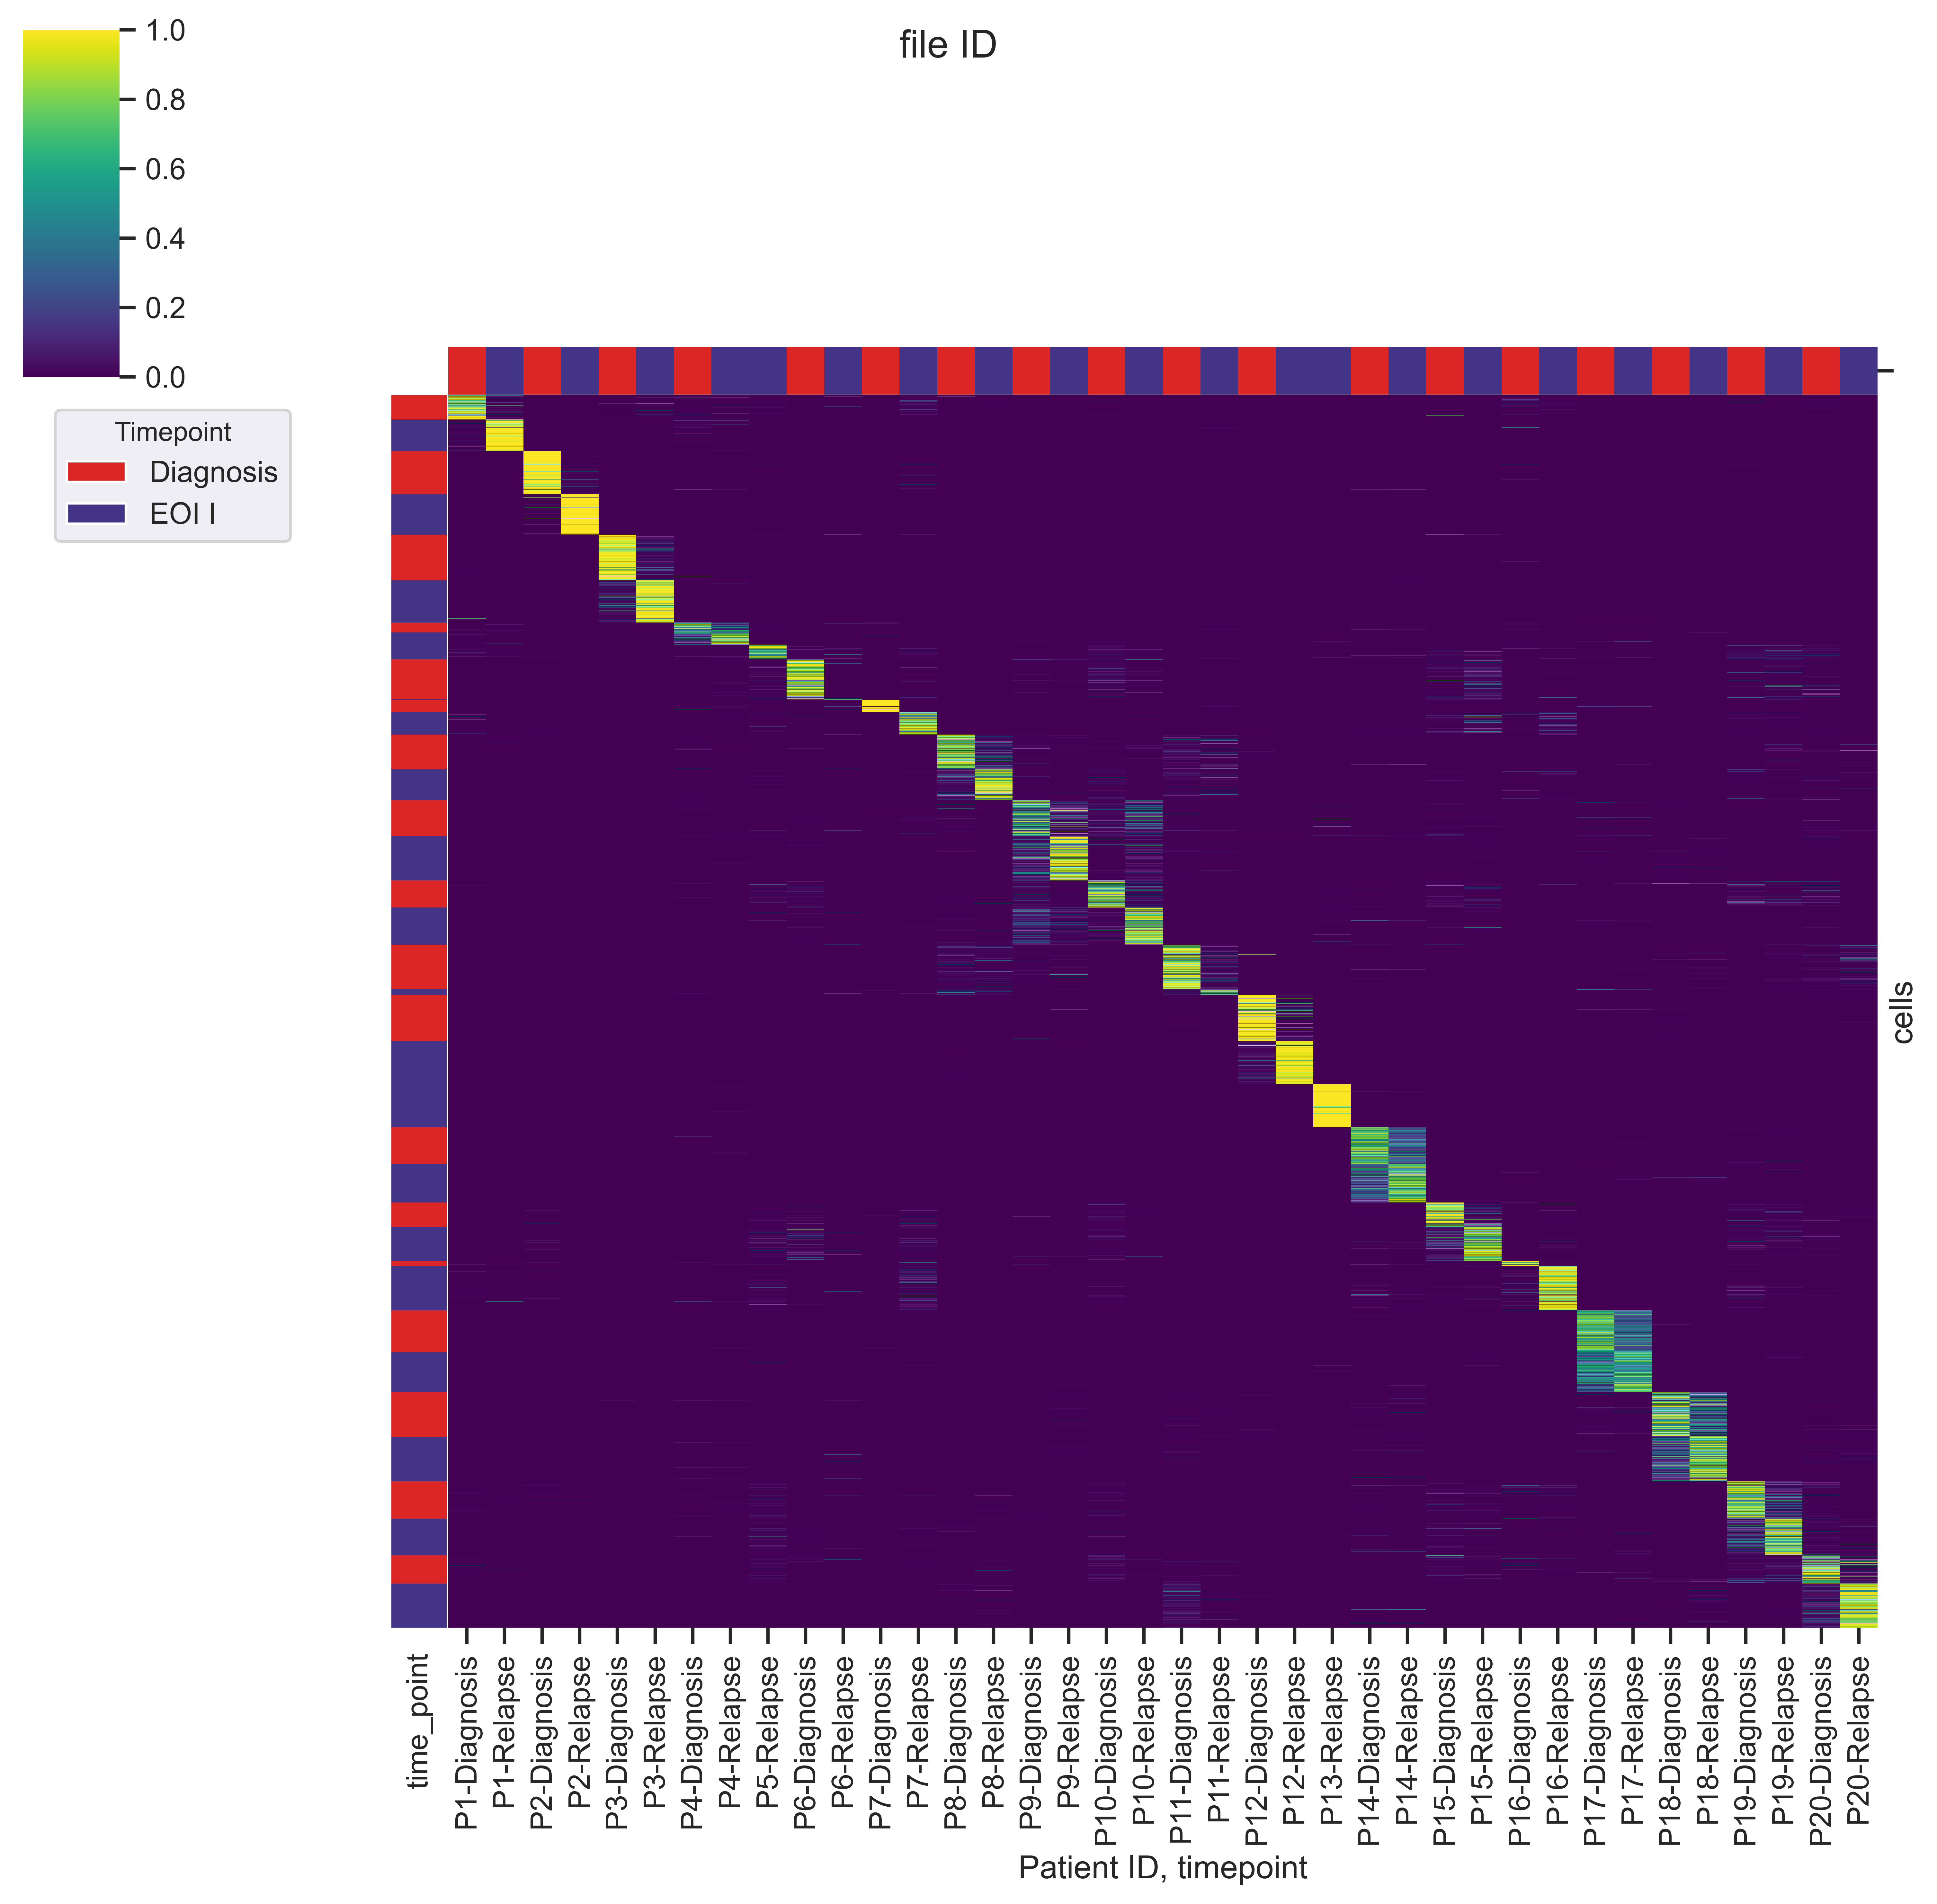

In [11]:
print("file ID")

# Select and order columns
temp = fileID.T.reset_index(drop=False).rename(columns={"index": "file_id"})
temp = temp.merge(blasts_files)
temp["PatientID"] = [patient_to_id[p] for p in temp["patient_id"]]
temp = temp[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
temp = temp.set_index(["PatientID", "time_point"], append=False)
temp = temp.drop(["patient_id", "file_id"], axis=1)
temp = temp.T

# Select and order rows
temp[["PatientID", "time_point"]] = blast_meta[["PatientID", "time_point"]]
temp = temp.loc[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
row_meta = temp.loc[:,["PatientID", "time_point"]]
temp = temp.drop(["PatientID", "time_point"], axis=1)


row_colors = row_meta["time_point"].map(timepoints_cmap)
col_colors = pd.Series([c[1] for c in temp.columns], index=temp.columns).map(timepoints_cmap)

g = sns.clustermap(temp, cmap="viridis", row_cluster=False, col_cluster=False, 
                   row_colors=row_colors, col_colors = col_colors, xticklabels=True,
                  yticklabels=False)
g.fig.suptitle("file ID")
g.ax_heatmap.set(xlabel='Patient ID, timepoint', ylabel='cells')
handles = [Patch(facecolor=timepoints_cmap[name]) for name in blasts_files["time_point"].unique() if not name=="EOI I"]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=timepoints_cmap.keys())
l2.set_title(title='Timepoint',prop={'size':10})
g.ax_heatmap.tick_params(right=False, bottom=True)

plt.savefig(f"/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure3/markers_predicted_blasts_fileID_cells.png", 
            bbox_inches="tight", dpi=300)

# Latent space - blasts

In [12]:
pred = np.load("/Users/adr/Box/iPC_work/Local_files_for_paper/Model/Experiments/sklear_models/LCO/L1O/svm_prediction.npy")
blast_meta = cell_meta[pred=="Blast"].reset_index(drop=True)
blasts_files = blast_meta[["file_id", "patient_id", "time_point"]].drop_duplicates().reset_index(drop=True)

In [13]:
# Load results from CCC
fileID = pd.read_csv("Latent_space/Blasts/file_id_post_p.csv", index_col=0)
# patientID = pd.read_csv("Latent_space/Blasts/patient_id_post_p.csv", index_col=0)

In [14]:
# Make file ID numeric
fileID.columns = fileID.columns[:-2].astype("int64").append(fileID.columns[-2:])
fileID_classes.columns = fileID_classes.columns.astype("int64")

# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

# Sort on patient ID
patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patientID = patientID[patient_to_id.values()]




NameError: name 'fileID_classes' is not defined

In [ ]:
# print("file ID")

# Select and order columns
temp = fileID.T.reset_index(drop=False).rename(columns={"index": "file_id"})
temp = temp.merge(blasts_files)
temp["PatientID"] = [patient_to_id[p] for p in temp["patient_id"]]
temp = temp[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
temp = temp.set_index(["PatientID", "time_point"], append=False)
temp = temp.drop(["patient_id", "file_id"], axis=1)
temp = temp.T

# Select and order rows
temp[["PatientID", "time_point"]] = blast_meta[["PatientID", "time_point"]]
temp = temp.loc[temp["time_point"]!="EOI I"]
temp = temp.sort_values(["PatientID", "time_point"],
                  key=lambda idx: [int(x.replace("P", "")) if idx.name=="PatientID"  else x for x in idx])
row_meta = temp.loc[:,["PatientID", "time_point"]]
temp = temp.drop(["PatientID", "time_point"], axis=1)

row_colors = row_meta["time_point"].map(timepoints_cmap)
col_colors = pd.Series([c[1] for c in temp.columns], index=temp.columns).map(timepoints_cmap)

g = sns.clustermap(temp, cmap="viridis", row_cluster=False, col_cluster=False, 
                   row_colors=row_colors, col_colors = col_colors, xticklabels=True,
                  yticklabels=False)
g.fig.suptitle("file ID")
g.ax_heatmap.set(xlabel='Patient ID, timepoint', ylabel='cells')
handles = [Patch(facecolor=timepoints_cmap[name]) for name in blasts_files["time_point"].unique() if not name=="EOI I"]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=timepoints_cmap.keys())
l2.set_title(title='Timepoint',prop={'size':10})
g.ax_heatmap.tick_params(right=False, bottom=True)

plt.savefig(f"/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Figure3/latent_space_predicted_blasts_fileID_cells.png", 
            bbox_inches="tight", dpi=300)


In [ ]:
# row_colors = blast_meta["PatientID"].map(id_cmap)
# g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
#                   yticklabels=False, row_colors=row_colors)
# g.fig.suptitle("patient ID")
# g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
# g.ax_heatmap.tick_params(right=False)
# handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
# l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=id_cmap.keys())
# l2.set_title(title='Patient ID',prop={'size':10})
# plt.savefig(f"{fig_dir}/latent_blasts_patientID_cells.png", bbox_inches="tight")


# NonMyeloid cells

## K100 - like markers and latent space

In [ ]:
meta = pd.read_csv("/Users/adr/Box/iPC_work/Local_files_for_paper/Updated/NonMyeloid/non_myeloid_meta.csv",
                  index_col=0)
meta["PatientID"] = [patient_to_id[p] for p in meta["patient_id"]]
file_m = meta[["file_id", "patient_id", "time_point", "PatientID"]].drop_duplicates().reset_index(drop=True)

In [ ]:
patientID = pd.read_csv("NonMyeloid/k100/patient_id_post_p.csv", index_col=0)


In [ ]:
# Replace patient name by ID
patientID.columns = [patient_to_id[col] if col in patient_to_id.keys() else col for col in patientID.columns]
patientID["class"] = [patient_to_id[p] for p in patientID["class"]]

patientID = patientID.sort_values("class", key = lambda idx: [int(x.replace("P", "")) for x in idx])
patient_row_cols = patientID["class"]
patientID = patientID[patient_to_id.values()]

In [ ]:
row_colors = patient_row_cols.map(id_cmap)
col_colors = patientID.columns.map(id_cmap)
g = sns.clustermap(patientID, cmap="viridis", row_cluster=False, col_cluster=False, xticklabels=True,
                  yticklabels=False, row_colors=row_colors, col_colors=col_colors)
g.fig.suptitle("patient ID")
g.ax_heatmap.set(xlabel='patient ID', ylabel='cells')
g.ax_heatmap.tick_params(right=False, pad=15)
handles = [Patch(facecolor=id_cmap[name]) for name in id_cmap.keys()]
l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=id_cmap.keys())
l2.set_title(title='Patient ID',prop={'size':10})

# Move column annotation from top to bottom
ax_col_colors = g.ax_col_colors
box = ax_col_colors.get_position()
box_heatmap = g.ax_heatmap.get_position()
ax_col_colors.set_position([box_heatmap.min[0], box_heatmap.min[1]-box.height, box.width, box.height])


plt.savefig("/Users/adr/Box/iPC_AML/Documents/Manuscript/Figures/Suppl_Figure1/NonMyeloidProgenitor_markers_patientID_cells.png", 
            bbox_inches="tight", dpi=300)
